# Car Accident Severity Report

### Applied Data Science Capstone  IBM Coursera

### Introduction & Business Understanding:


In an effort to reduce the frequency of car collisions in a community, a machine learning model must be developed to predict the severity of an accident given the current weather, road and visibility conditions. When conditions are bad, Whether or not a driver involved was under the influence of drugs or alcohol, this model will alert drivers to remind them to be more careful on the Roads.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [3]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/Users/Mehdi/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
df1 = df[['WEATHER', 'ROADCOND', 'LIGHTCOND', 'SEVERITYCODE']]
df1.head()

,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
0,Overcast,Wet,Daylight,2
1,Raining,Wet,Dark - Street Lights On,1
2,Overcast,Dry,Daylight,1
3,Clear,Dry,Daylight,1
4,Raining,Wet,Daylight,2


## Data Understanding:

Data source: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
The meta-data: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf

The data was collected by SDOT Traffic Management Division, Traffic Records Group from 2004 to present.
The data consists of 37 independent variable and 194,673 rows, and the variable thats gonna be our target will be SEVERITYCODE because it is used measure the severity of an accident from 0 to 5 within the dataset. Attributes used to weigh the severity of an accident are WEATHER, ROADCOND and LIGHTCOND.

•	Severity codes are as follows:
0.	Unknown (Clear Conditions)
1.	Property damage
2.	injury
3.	serious injury
4.	fatality


## Extract Dataset and Convert

In [14]:
# Label Encoding
# Convert column to category
df1["WEATHER"] = df1["WEATHER"].astype('category')
df1["ROADCOND"] = df1["ROADCOND"].astype('category')
df1["LIGHTCOND"] = df1["LIGHTCOND"].astype('category')

# Assign variable to new column
df1["WEATHER_CAT"] = df1["WEATHER"].cat.codes
df1["ROADCOND_CAT"] = df1["ROADCOND"].cat.codes
df1["LIGHTCOND_CAT"] = df1["LIGHTCOND"].cat.codes


/Users/Mehdi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Mehdi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/Mehdi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [15]:
df1.head()

,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT
0,Overcast,Wet,Daylight,2,4,8,5
1,Raining,Wet,Dark - Street Lights On,1,6,8,2
2,Overcast,Dry,Daylight,1,4,0,5
3,Clear,Dry,Daylight,1,1,0,5
4,Raining,Wet,Daylight,2,6,8,5


In [73]:
df1.describe()

,SEVERITYCODE,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT
count,189337.000000,189337.000000,189337.000000,189337.000000
mean,1.301325,3.082583,2.599920,4.400223
std,0.458835,2.853934,3.651359,1.713298
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,2.000000
50%,1.000000,1.000000,0.000000,5.000000
75%,2.000000,6.000000,8.000000,5.000000
max,2.000000,10.000000,8.000000,8.000000


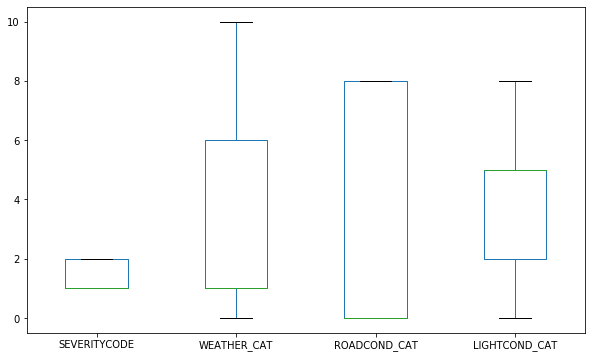

In [72]:
df1.plot(kind='box', figsize=(10, 6))

In [16]:
df1.dtypes

WEATHER          category
ROADCOND         category
LIGHTCOND        category
SEVERITYCODE        int64
WEATHER_CAT          int8
ROADCOND_CAT         int8
LIGHTCOND_CAT        int8
dtype: object

## Checking for the Null values in our dataset

In [17]:
df1.isna().sum()

WEATHER          5081
ROADCOND         5012
LIGHTCOND        5170
SEVERITYCODE        0
WEATHER_CAT         0
ROADCOND_CAT        0
LIGHTCOND_CAT       0
dtype: int64

## Dropping all rows that has a null value

In [18]:
df1.dropna(inplace=True)
df1.isna().sum()

/Users/Mehdi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


WEATHER          0
ROADCOND         0
LIGHTCOND        0
SEVERITYCODE     0
WEATHER_CAT      0
ROADCOND_CAT     0
LIGHTCOND_CAT    0
dtype: int64

## Balacing the dataset with the class 1 and 2

In [20]:
from sklearn.utils import resample

In [21]:
df_maj = df1[df1.SEVERITYCODE == 1]
df_min = df1[df1.SEVERITYCODE == 2]
df_2_samples = resample(df_maj, replace=False, n_samples=58188, random_state=0)

df_balanced = pd.concat([df_2_samples, df_min])
df_balanced['SEVERITYCODE'].value_counts()

1    58188
2    57052
Name: SEVERITYCODE, dtype: int64

In [22]:
df_balanced['SEVERITYCODE'].value_counts()

1    58188
2    57052
Name: SEVERITYCODE, dtype: int64

In [23]:
df_balanced["WEATHER"].value_counts()

Clear                       68889
Raining                     20826
Overcast                    16974
Unknown                      7176
Snowing                       476
Other                         428
Fog/Smog/Smoke                359
Sleet/Hail/Freezing Rain       63
Blowing Sand/Dirt              29
Severe Crosswind               15
Partly Cloudy                   5
Name: WEATHER, dtype: int64

In [24]:
df_balanced["ROADCOND"].value_counts()

Dry               77039
Wet               29626
Unknown            7144
Ice                 670
Snow/Slush          522
Other                82
Standing Water       67
Sand/Mud/Dirt        50
Oil                  40
Name: ROADCOND, dtype: int64

In [25]:
df_balanced["LIGHTCOND"].value_counts()

Daylight                    72707
Dark - Street Lights On     29227
Unknown                      6349
Dusk                         3741
Dawn                         1570
Dark - No Street Lights       814
Dark - Street Lights Off      691
Other                         136
Dark - Unknown Lighting         5
Name: LIGHTCOND, dtype: int64

## Define X and y

In [27]:
X = df_balanced.iloc[:, 4:].values
y = df_balanced.iloc[:, 3].values

In [28]:
X[:5]

array([[ 1,  0,  2],
       [ 3,  7,  8],
       [10,  7,  8],
       [ 6,  8,  5],
       [ 1,  0,  5]], dtype=int8)

In [29]:
y[: 5]

array([1, 1, 1, 1, 1])

In [30]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X[: 5]

array([[-0.71908766, -0.69400808, -1.43997571],
       [ 0.0169217 ,  1.22836933,  2.21133186],
       [ 2.59295448,  1.22836933,  2.21133186],
       [ 1.12093575,  1.50299467,  0.38567807],
       [-0.71908766, -0.69400808,  0.38567807]])

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [33]:
print("X_train size: ", X_train.shape)
print("y_train size: ", y_train.shape)
print("X_test size: ", X_test.shape)
print("y_test size: ", y_test.shape)

X_train size:  (80668, 3)
y_train size:  (80668,)
X_test size:  (34572, 3)
y_test size:  (34572,)


## Building the KNN Model

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
KNN = KNeighborsClassifier(5)

In [37]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [38]:
y_pred = KNN.predict(X_test)
y_pred[:5]

array([1, 2, 2, 1, 2])

In [48]:
best_k = []
score = []
for k in range(1, 25):
    KNN = KNeighborsClassifier(k)
    KNN.fit(X_train, y_train)
    best_k.append(k)
    ## The score method in the instance of KNN is just same as f1_score
    score.append(KNN.score(X_test, y_test))


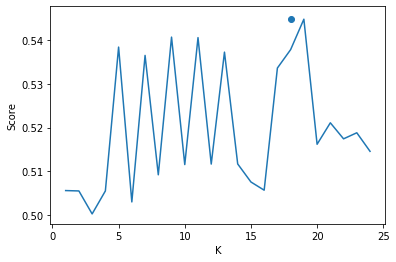

In [53]:
plt.plot(range(1, 25), score)
plt.scatter(score.index(max(score)), max(score))
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

# the best k is 18 with score of

In [54]:
score.index(max(score))

18

In [55]:
max(score)

0.5448339696864515

In [56]:
KNN = KNeighborsClassifier(18).fit(X_train, y_train)

In [57]:
y_predKNN = KNN.predict(X_test) 

In [58]:
y_predKNN[:5]

array([1, 2, 2, 1, 2])

## Building The Decision Tree Model

## for Decision Tree we don't need to Scale our Feature but it will work fine with Scalled feature

In [59]:
from sklearn.tree import DecisionTreeClassifier
DC = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
DC.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [60]:
DT_ypredt = DC.predict(X_test)
print (DT_ypredt [0:5])
print (y_test [0:5])

[1 2 2 2 2]
[2 2 1 1 2]


## Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.1).fit(X_train,y_train)
LR

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
LR_pred = LR.predict(X_test)
LR_pred[:5]

array([1, 2, 2, 1, 1])

In [63]:
LR_predPro =  LR.predict_proba(X_test)

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [65]:
print('The Jaccard Score:')
print('KNN Jaccard:{:.2f}'.format(jaccard_similarity_score(y_test, y_predKNN)))
print('Decision Tree Jaccard:{:.2f}'.format(jaccard_similarity_score(y_test, DT_ypredt)))
print('Logistic Regression Jaccard:{:.2f}'.format(jaccard_similarity_score(y_test, LR_pred)))
print('\nThe f1_score')
print('KNN f1_score:{:.2f}'.format(f1_score(y_test, y_predKNN)))
print('Decision Tree f1_score:{:.2f}'.format(f1_score(y_test, DT_ypredt)))
print('Logistic Regression f1_score:{:.2f}'.format(f1_score(y_test, LR_pred)))

The Jaccard Score:
KNN Jaccard:0.54
Decision Tree Jaccard:0.56
Logistic Regression Jaccard:0.53

The f1_score
KNN f1_score:0.53
Decision Tree f1_score:0.43
Logistic Regression f1_score:0.45


/Users/Mehdi/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


### LOGLOSS for Logistic Regression

In [71]:
print('Logistic Regression LOGLOSS: {:.2f}'.format(log_loss(y_test, LR_predPro)))

Logistic Regression LOGLOSS: 0.68


## Conclusion:


Based on historical data from weather conditions pointing to certain classes, we can conclude that particular weather conditions have a somewhat impact on whether or not travel could result in property damage (code | class 1) or injury (code | class 2).
